# Exploratory Data Analysis

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
INPUT_DIR = "../data/"
data = pd.read_csv(os.path.join(INPUT_DIR, "train.csv"))
X_test = pd.read_csv(os.path.join(INPUT_DIR, "test.csv"))

In [3]:
data.shape

(5282, 20)

In [4]:
data.dtypes

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                   object
Sex                          object
IsSeniorCitizen               int64
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
Churn                         int64
dtype: object

In [5]:
data.sample(5, random_state=0)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
4650,66,20.35,1359.5,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Electronic check,0
29,25,89.70,2187.55,Female,1,No,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check,1
1688,36,76.35,2606.35,Female,0,No,No,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,No,One year,Yes,Mailed check,0
2946,20,19.60,356.15,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),0
4865,13,98.00,1237.85,Male,1,Yes,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1


In [6]:
num_cols = [
    "ClientPeriod",
    "MonthlySpending",
    "TotalSpent",
]

cat_cols = [
    "Sex",
    "IsSeniorCitizen",
    "HasPartner",
    "HasChild",
    "HasPhoneService",
    "HasMultiplePhoneNumbers",
    "HasInternetService",
    "HasOnlineSecurityService",
    "HasOnlineBackup",
    "HasDeviceProtection",
    "HasTechSupportAccess",
    "HasOnlineTV",
    "HasMovieSubscription",
    "HasContractPhone",
    "IsBillingPaperless",
    "PaymentMethod",
]

target = 'Churn'

In [7]:
print(f"Duplicated rows: {data.duplicated(keep=False).sum()}")
print(f"Duplicated rows without target: {data.drop(target, axis=1).duplicated(keep=False).sum()}")

Duplicated rows: 28
Duplicated rows without target: 41


We have 28 identical rows. And if we drop the target column this number increases up to 41. Sometimes, we can't predict one client class from another no matter how good our model is.

In [8]:
data[data.drop(target, axis=1).duplicated(keep=False)].sort_values(by=[*data.columns])

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
838,1,19.65,19.65,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
1636,1,19.65,19.65,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
4811,1,19.65,19.65,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,1
3463,1,19.75,19.75,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
4294,1,19.75,19.75,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,1
3831,1,20.00,20,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
1647,1,20.00,20,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,1
594,1,20.05,20.05,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
1474,1,20.05,20.05,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
3735,1,20.20,20.2,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0


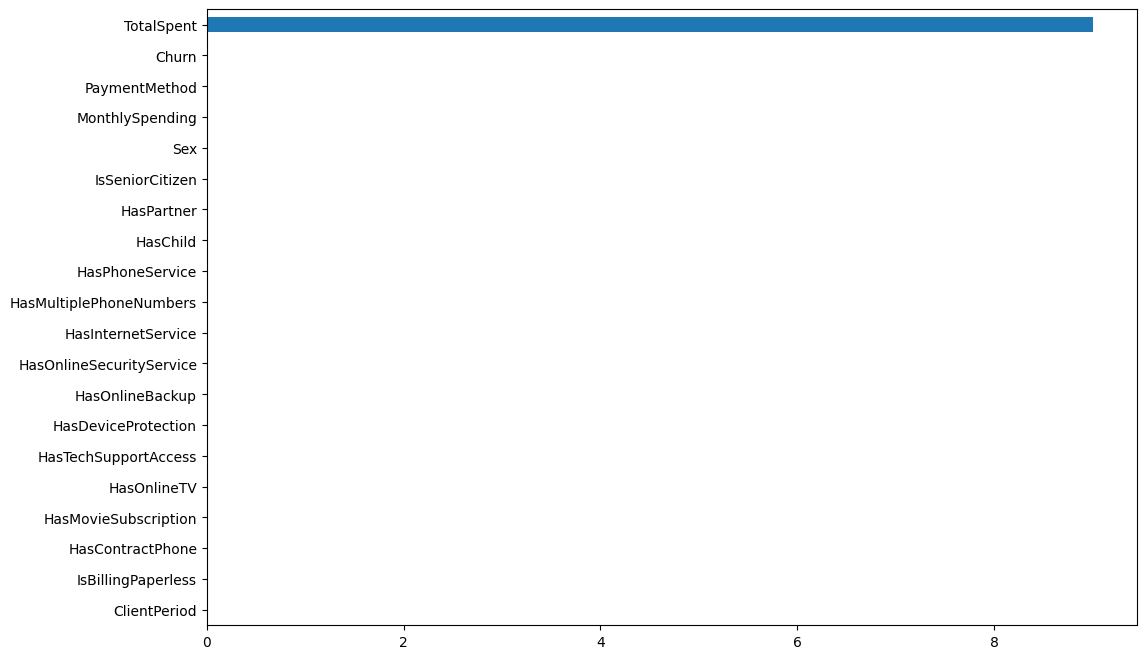

In [9]:
data.replace(" ", np.nan, inplace=True)
X_test.replace(" ", np.nan, inplace=True)
pd.DataFrame(data.isna().sum(), columns=["NaN Count"]) \
    .sort_values("NaN Count") \
    .plot(kind="barh", legend=False, figsize=(12, 8));

We have 9 NaN's in TotalSpent column. Let's take a closer look at these clients.

In [10]:
data.sort_values("TotalSpent").tail(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1157,11,94.20,999.9,Female,0,No,No,Yes,No,Fiber optic,No,Yes,Yes,Yes,No,Yes,Month-to-month,Yes,Electronic check,0
1048,0,25.75,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,NaN,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,NaN,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,NaN,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,NaN,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,NaN,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,NaN,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,NaN,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


Obviously it's new clients who did not make first payment yet. Let's fill them with zeroes.

In [11]:
data["TotalSpent"] = data.TotalSpent.fillna(0).astype(float)
X_test["TotalSpent"] = X_test.TotalSpent.fillna(0).astype(float)

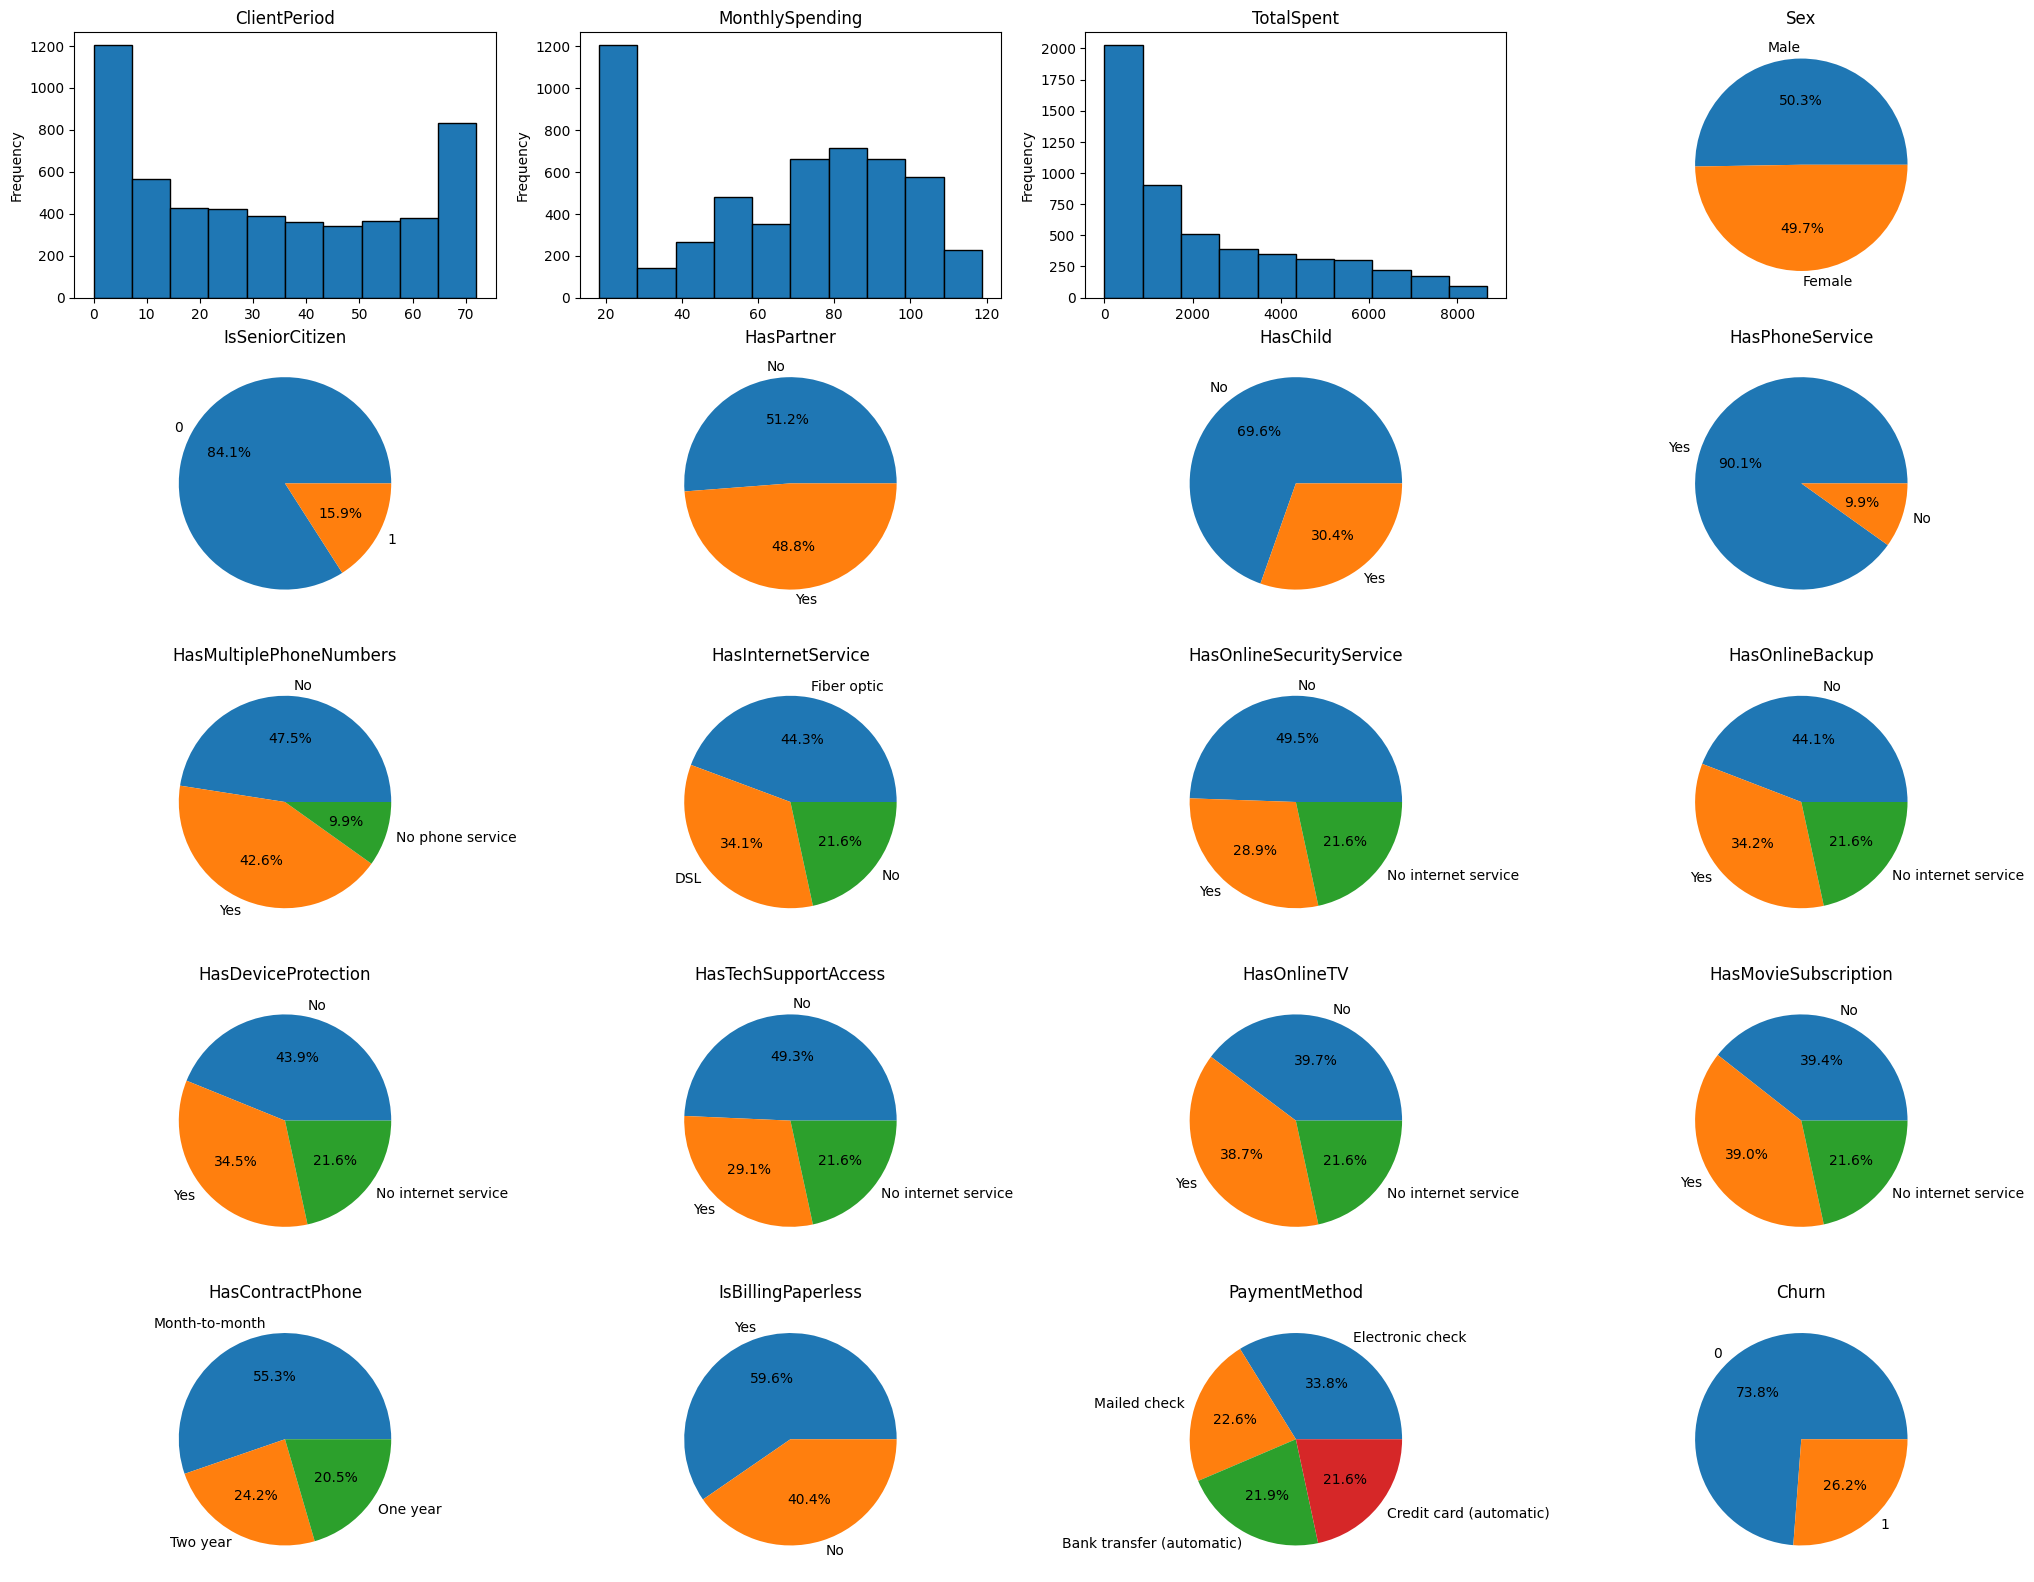

In [12]:
fig, axes = plt.subplots(5, 4, figsize=(25, 20))
for ax, col in zip(axes.flatten(), data.columns):
    ax.set_title(col)
    if col in cat_cols or col == target:
        ax.pie(data[col].value_counts(), autopct="%1.1f%%", labels=data[col].value_counts().index)
    else:
        data[col].plot(kind="hist", ec="black", ax=ax)

On chart Churn in the lower right corner you can see that class 1 represented by a quarter of the data. What means people are three times more likely stay than leave.

Many columns have values «No internet service» and «No Phone service». Since we already have the «HasPhoneService» and «HasInternetService» features, this information is redundant. We can combine them with the «No» option.

The PaymentMethod column contains «Mailed check», «Electronic check», «Bank transfer (automatic)» and «Credit card (automatic)» values. I guess the only relevant here is whether the payment is made automatically or not.

Let's take a look at the correlation with the target variable.

In [13]:
tmp = data.groupby("PaymentMethod", as_index=False).agg({"Churn": ["sum", "count"]})
tmp["Churn (%)"] = 100 * tmp["Churn", "sum"] / tmp["Churn", "count"]
tmp.sort_values("Churn (%)").reset_index(drop=True)

PaymentMethod Churn        Churn (%)
                               sum count           
0    Credit card (automatic)   165  1143  14.435696
1  Bank transfer (automatic)   195  1159  16.824849
2               Mailed check   230  1194  19.262982
3           Electronic check   794  1786  44.456887

Surprisingly the difference between electronic check and other payment methods is much more than between automatic and non-automatic.

Now let's check the correlation between the presence of a phone and a target.

In [14]:
tmp = data.groupby("HasContractPhone", as_index=False).agg({"Churn": ["sum", "count"]})
tmp["Churn (%)"] = 100 * tmp["Churn", "sum"] / tmp["Churn", "count"]
tmp.sort_values("Churn (%)").reset_index(drop=True)

HasContractPhone Churn        Churn (%)
                     sum count           
0         Two year    33  1280   2.578125
1         One year   120  1082  11.090573
2   Month-to-month  1231  2920  42.157534

People with long-term phone contracts are reluctant to terminate the them.

In [15]:
tmp = data.groupby("HasInternetService", as_index=False).agg({"Churn": ["sum", "count"]})
tmp["Churn (%)"] = 100 * tmp["Churn", "sum"] / tmp["Churn", "count"]
tmp.sort_values("Churn (%)").reset_index(drop=True)

HasInternetService Churn        Churn (%)
                       sum count           
0                 No    82  1141   7.186678
1                DSL   342  1800  19.000000
2        Fiber optic   960  2341  41.008116

People with optics are more often unsatisfied with provider serivces than DSL users.

Let's take a look how loyalty depends on СlientPeriod.

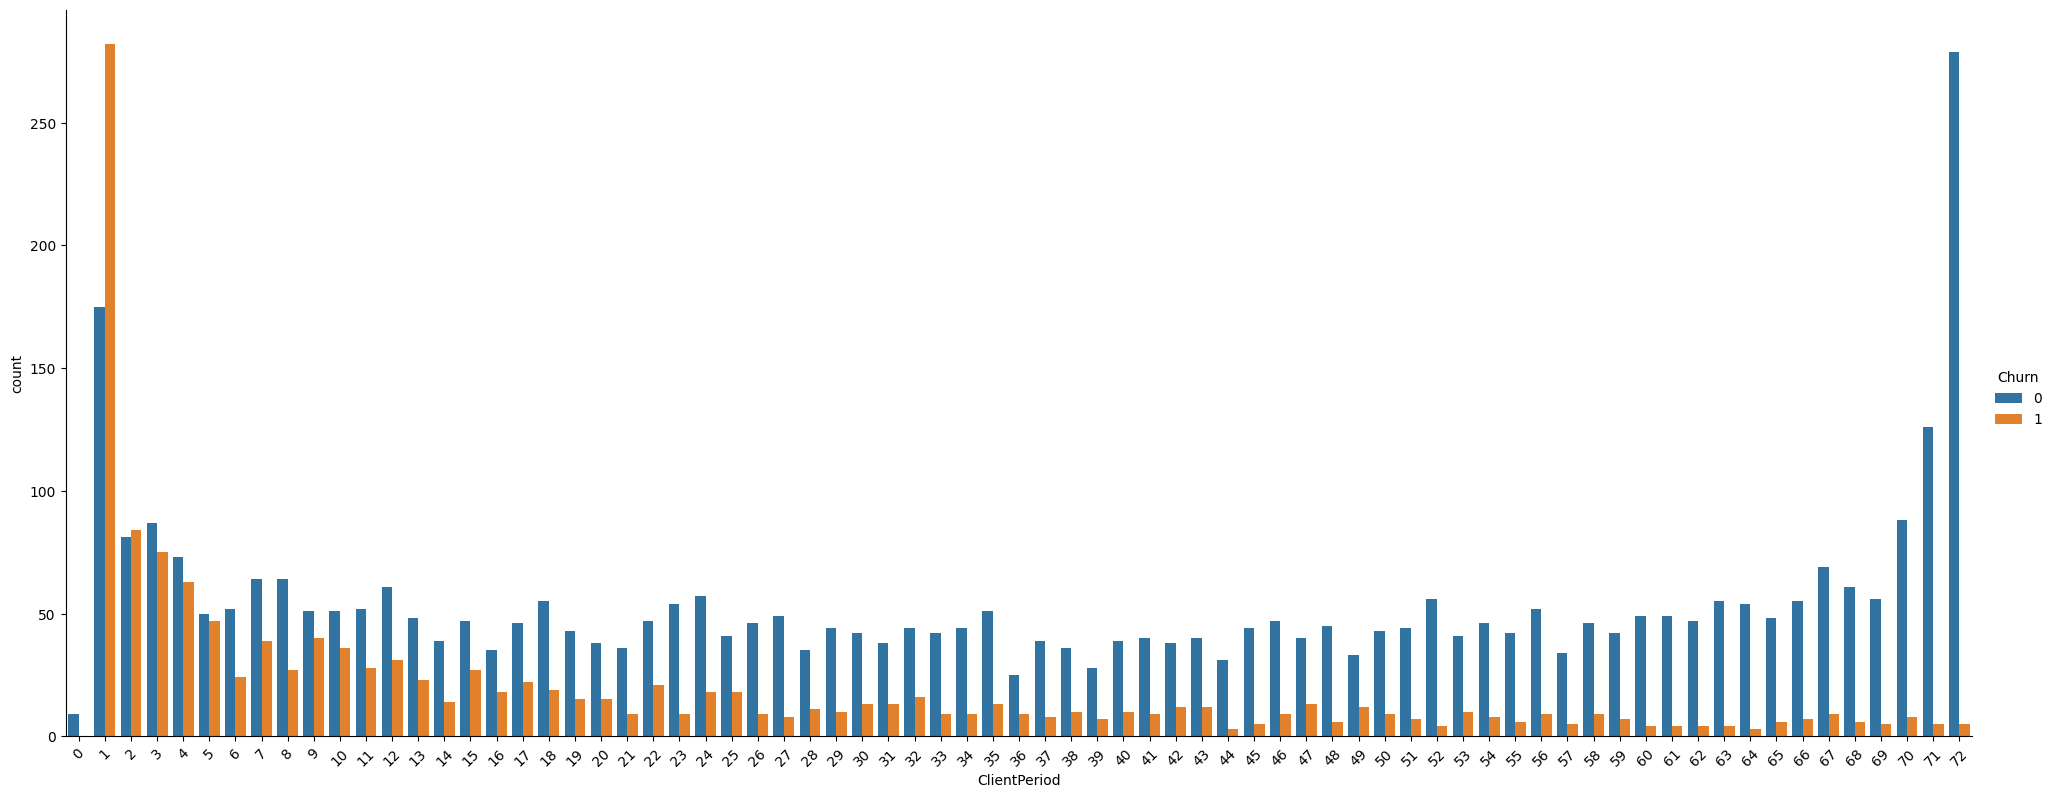

In [16]:
sns.catplot(data=data, x="ClientPeriod", hue="Churn", kind="count", height=8, aspect=20/8)
plt.xticks(rotation=45);

New users are more inclined to churn with peak in the first month. Regular customers remain faithful to the habits.

Let's convert categorical features to int type according to observations. I.e. values «No internet service» and «No phone service» get the same number as «No» - 0. Values in «PaymentMethod» and «HadContractPhone» will be numbered according to their correlation with the target. Binary values will be assigned 0 and 1.

In [17]:
patterns = {
    "No": 0,
    "No internet service": 0,
    "No phone service": 0,
    "Yes": 1,
    "Male": 0,
    "Female": 1,
    "DSL": 1,
    "Fiber optic": 2,
    "Month-to-month": 0,
    "One year": 1,
    "Two year": 2,
    "Credit card (automatic)": 0,
    "Bank transfer (automatic)": 1,
    "Mailed check": 2,
    "Electronic check": 3,
}
X_train = data.replace(patterns).drop(target, axis=1)
y_train = data[target]
X_test = X_test.replace(patterns)

It makes possible to draw correlation heatmap.

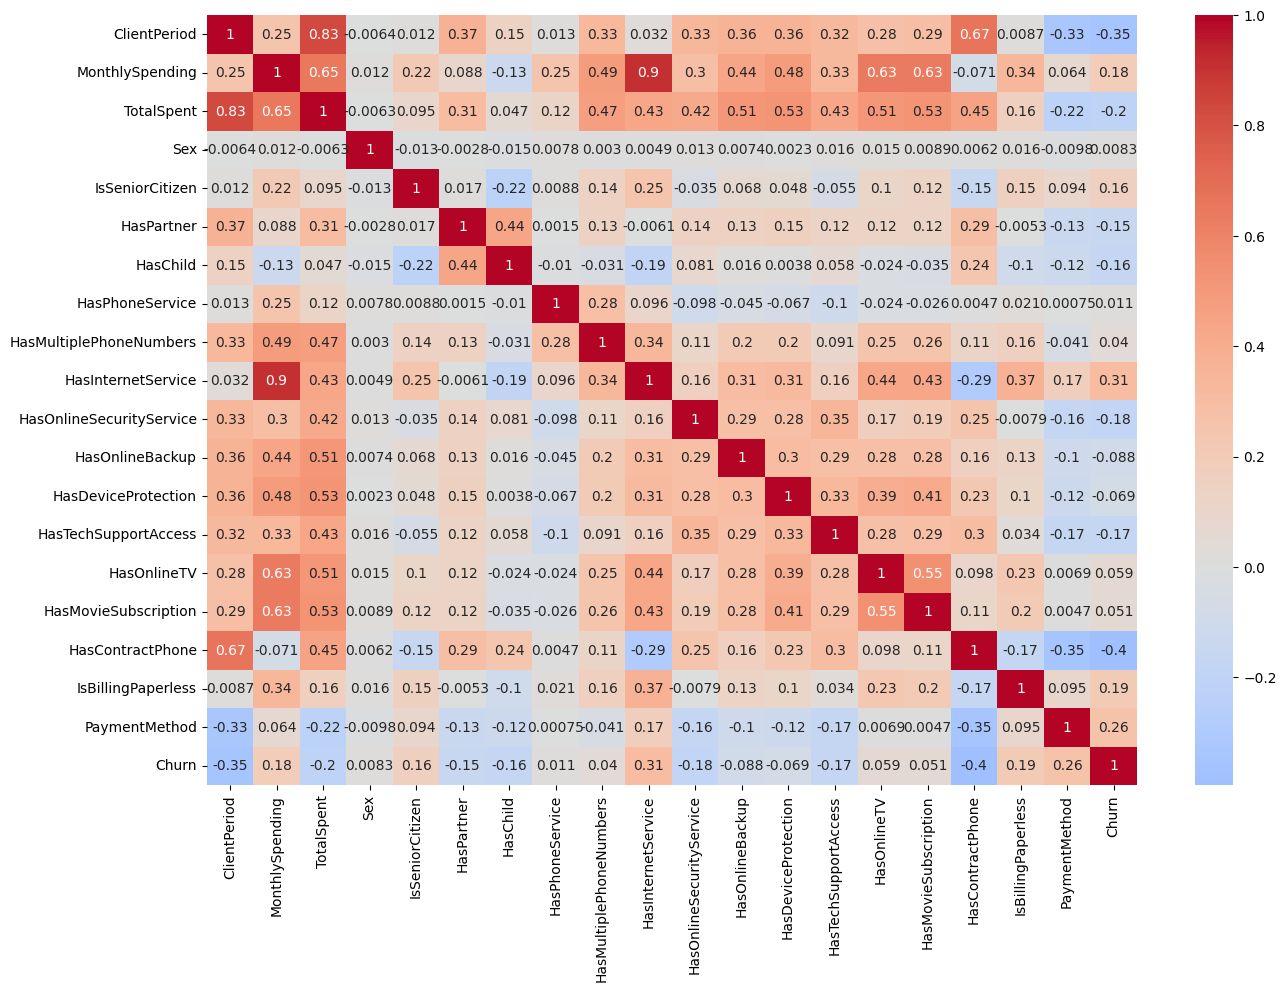

In [18]:
sns.heatmap(data=pd.concat([X_train, y_train], axis=1).corr(),
            annot=True,
            cmap="coolwarm",
            center=0,
            ax=plt.subplots(figsize=(15,10))[1]);

HasContractPhone has strongest correlation with target (-0.4), then goes ClientPeriod(-0.35), and HasInternetService (0.31). In first two cases correlation is negative. It's positive in the last. It's tempting to think that provider gained very loyal phone users over the years, then decided to go to internet market and didn't do so well...

Let's evaluate feature importance with RandomForest.

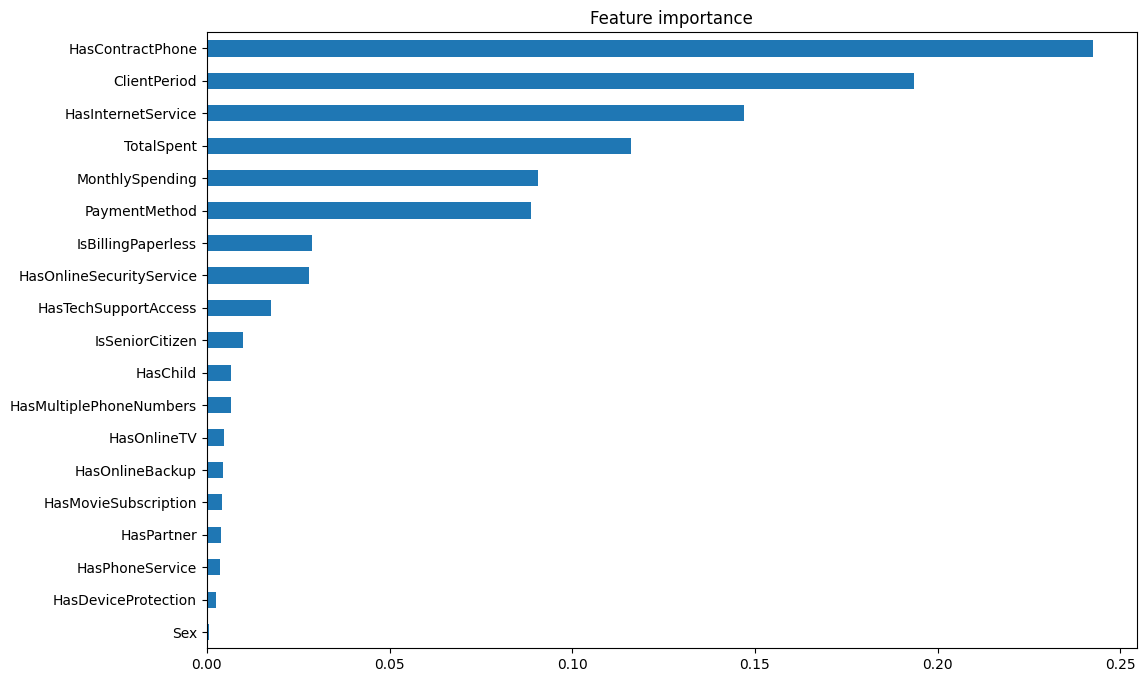

In [19]:
clf = RandomForestClassifier(n_estimators=1000, min_impurity_decrease=0.001)
clf.fit(X_train, y_train)
pd.DataFrame(clf.feature_importances_, index=X_train.columns, columns=["importance"]) \
    .sort_values("importance") \
    .plot(kind="barh", legend=False, figsize=(12, 8));
plt.title("Feature importance");

The chart confirms our observations.

Now let's do the same with a single DecisionTree.

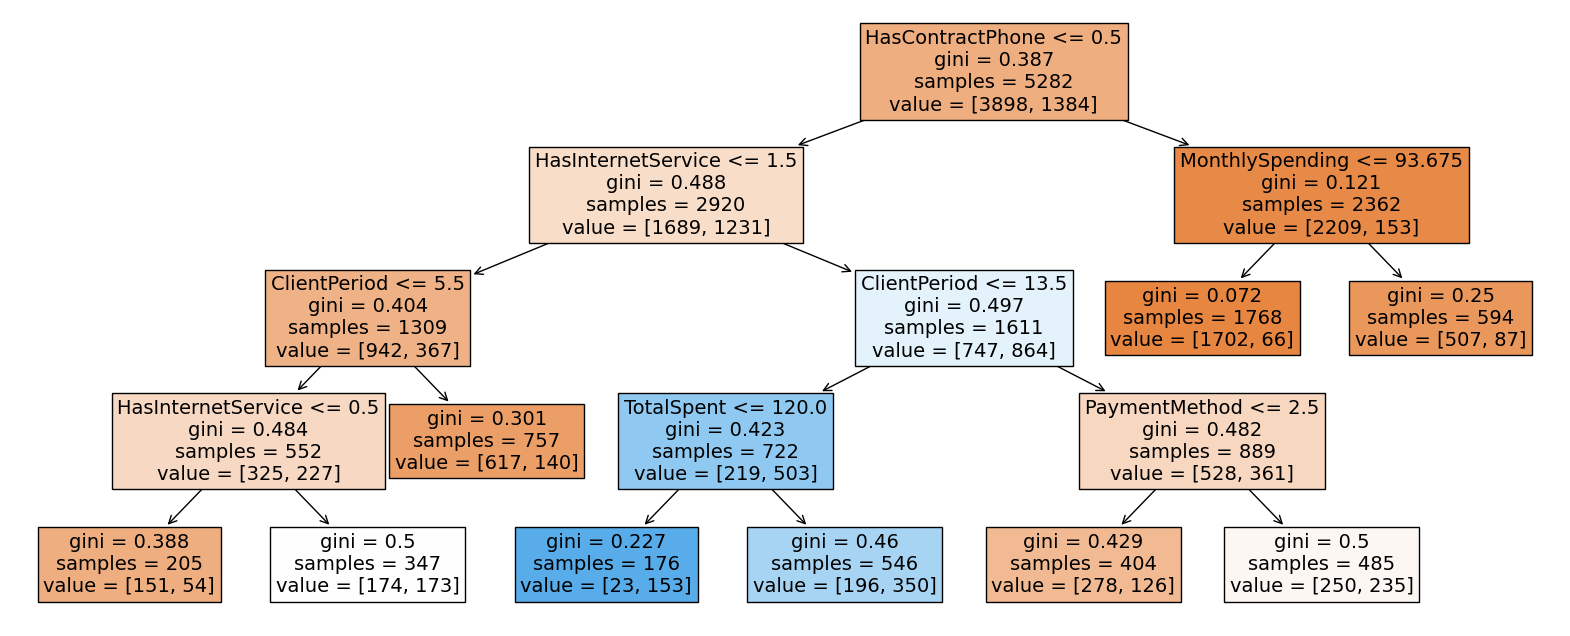

In [20]:
clf = DecisionTreeClassifier(min_impurity_decrease=0.002)
clf.fit(X_train, y_train)
plt.figure(figsize=(20, 8))
plot_tree(clf, fontsize=14, feature_names=X_train.columns, filled=True)
plt.show()

Let's look at explained variance ratio.

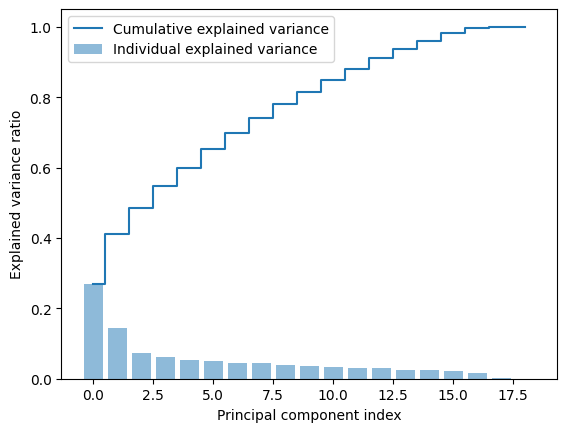

In [21]:
X_train_std = StandardScaler().fit_transform(X_train)
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
plt.bar(range(0, len(exp_var_pca)), exp_var_pca, alpha=0.5, align="center", label="Individual explained variance")
plt.step(range(0, len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where="mid", label="Cumulative explained variance")
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal component index")
plt.legend(loc="best")
plt.show()

Finally let's visualize data after reducing it's dimensionality with PCA.

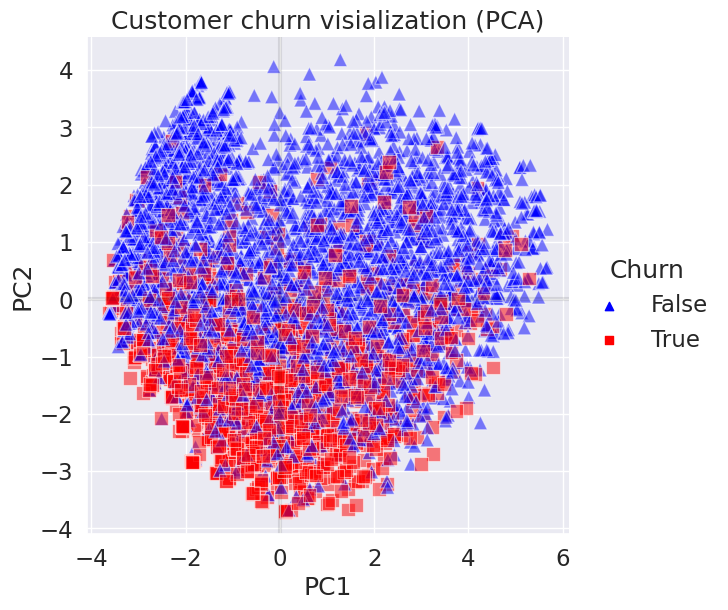

In [22]:
pca = PCA(n_components=2)
pca.fit(X_train_std)
x0, x1 = pca.components_
sns.set(font_scale=1.5)
y = data["Churn"].map({0: False, 1: True})
fig = sns.pairplot(data=pd.concat([pd.DataFrame(data=X_train_std @ np.stack([x0, x1]).T, columns=["PC1", "PC2"]), y], axis=1),
                   x_vars="PC1",
                   y_vars="PC2",
                   hue="Churn",
                   markers=('^', 's'),
                   palette=["blue", "red"],
                   plot_kws={'s': 100, 'alpha': 0.5},
                   height=6)
fig.set(title="Customer churn visialization (PCA)")
fig.axes[0][0].axhline(y=0, color='black', lw=3, alpha=0.1)
fig.axes[0][0].axvline(x=0, color='black', lw=3, alpha=0.1);

We can roughly divide classes with a stright line. So good old logistic regression probably will do.